## Challenges: Classification.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split

In [5]:
df = pd.read_csv("house-votes-84.csv", header = None)

In [6]:
df.columns = ['party','hndc_inf','water_project','budget_res','phys_fee','salvador','relig_grp','sattelite','nicaragua',
             'missile','immigration','synfuels','education','superfund', 'crime','dutyt_free','south_africa']

1. class name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)


In [7]:
df.shape

(435, 17)

In [8]:
df.head(5)

,party,hndc_inf,water_project,budget_res,phys_fee,salvador,relig_grp,sattelite,nicaragua,missile,immigration,synfuels,education,superfund,crime,dutyt_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Challenge 1

In [9]:
df = df.replace(to_replace = ['y','n','?'], value = [1,0,None])
df.head(5)

,party,hndc_inf,water_project,budget_res,phys_fee,salvador,relig_grp,sattelite,nicaragua,missile,immigration,synfuels,education,superfund,crime,dutyt_free,south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [10]:
df = df.fillna(df.mean(axis = 0));
df.head(5)

,party,hndc_inf,water_project,budget_res,phys_fee,salvador,relig_grp,sattelite,nicaragua,missile,immigration,synfuels,education,superfund,crime,dutyt_free,south_africa
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


### Challenge 2

In [11]:
#y, X = dmatrices('logDTG ~ sqrtBudget + Runtime + Rating', data=df, return_type='dataframe')
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.3,random_state=4444)

### Challenge 3

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
max_accuracy = 0
acc =[]

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_hat = knn.predict(x_test)
    acc.append(accuracy_score(y_test,y_hat))
    
max_accuracy = max(acc)

print('Maximum accuracy ', max_accuracy,' is achieved at k = ', [i for i,v in enumerate(acc) if v==max_accuracy])

Maximum accuracy  0.931297709924  is achieved at k =  [5, 8, 9]


### Challenge 4

In [14]:
from sklearn.linear_model import LogisticRegression
#from statsmodels.formula.api import Logit
#learns SVM models using the same algorithm.
#sklearn.svm.LinearSVC
#incrementally trained logistic regression (when given the parameter loss="log")


In [15]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_hat = LR.predict(x_test)
LR_accuracy = accuracy_score(y_test,y_hat)
    
print('Logistic Regression accuracy = ', LR_accuracy)

Logistic Regression accuracy =  0.93893129771


### Challenge 5

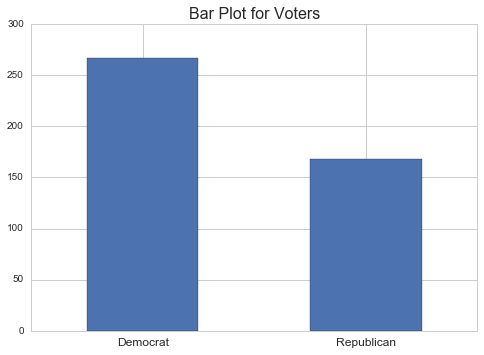

In [16]:
sns.set(style="whitegrid", color_codes=True)

fig = df.party.value_counts().plot(kind = 'bar')
plt.title("Bar Plot for Voters", fontsize = 16)
fig.set_xticklabels(['Democrat', 'Republican'],rotation = 'horizontal', fontsize = 12);


In [17]:
def predict_dem(X):
    size = X.shape
    res = pd.Series(np.empty(size[0]))
    res[:] = "democrat"
    return(res)

def predict_rep(X):
    size = X.shape
    res = pd.Series(np.empty(size[0]))
    res[:] = "republican"
    return(res)

In [18]:
y_hat = predict_dem(x_test)
dem_accuracy = accuracy_score(y_test,y_hat)

y_hat = predict_rep(x_test)
rep_accuracy = accuracy_score(y_test,y_hat)

print('Predicting all democrats has accuracy accuracy = ', dem_accuracy)
print('Predicting all republicans has accuracy accuracy = ', rep_accuracy)

Predicting all democrats has accuracy accuracy =  0.587786259542
Predicting all republicans has accuracy accuracy =  0.412213740458


### Challenge 6

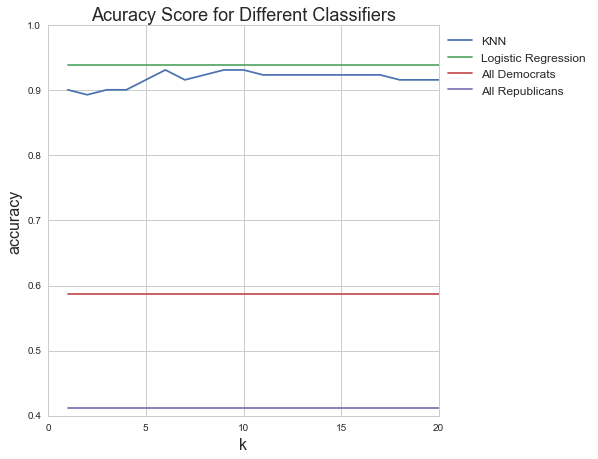

In [19]:
plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

p1, = plt.plot(range(1,21),acc)
p2, = plt.plot(range(1,21),np.ones(20)*LR_accuracy)
p3, = plt.plot(range(1,21),np.ones(20)*dem_accuracy)
p4, = plt.plot(range(1,21),np.ones(20)*rep_accuracy)

plt.xlabel('k', fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)
plt.title("Acuracy Score for Different Classifiers", fontsize=18)
plt.legend([p1, p2, p3, p4],['KNN','Logistic Regression','All Democrats','All Republicans'], loc=9, bbox_to_anchor=(1.2, 1), fontsize = 12)

### Challenge 7

In [20]:
from sklearn.learning_curve import learning_curve

In [21]:
train_sizes, train_scores, test_scores = learning_curve(LR, df.iloc[:,1:],df.iloc[:,0], cv=5, train_sizes=np.array([ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

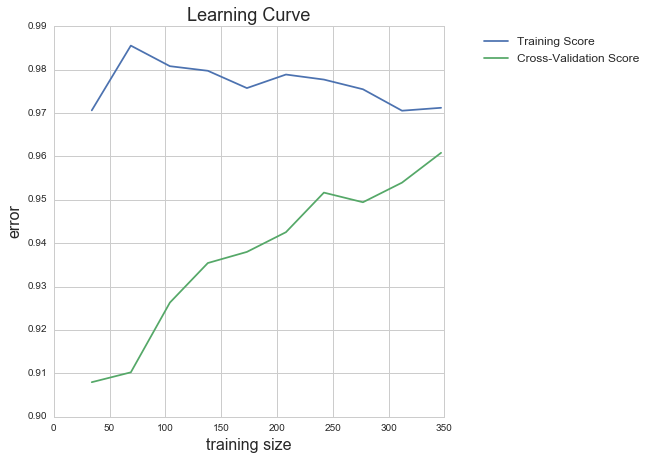

In [22]:
plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

p1, = plt.plot(train_sizes,train_scores_mean)
p2, = plt.plot(train_sizes,test_scores_mean);

plt.xlabel('training size', fontsize = 16)
plt.ylabel('error', fontsize = 16)
plt.title("Learning Curve", fontsize=18)
plt.legend([p1, p2],['Training Score', 'Cross-Validation Score'], loc=9, bbox_to_anchor=(1.3, 1), fontsize = 12);

In [23]:
train_sizes

array([ 34,  69, 104, 138, 173, 208, 242, 277, 312, 347])

### Challenge 8

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = GaussianNB()
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
GaussianNB_accuracy = accuracy_score(y_test,y_hat)
    
print('GaussianNB accuracy = ', GaussianNB_accuracy)

model = SVC()
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
SVC_accuracy = accuracy_score(y_test,y_hat)
    
print('SVC accuracy = ', SVC_accuracy)

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
RFC_accuracy = accuracy_score(y_test,y_hat)
    
print('Random Forest classifier accuracy = ', RFC_accuracy)

GaussianNB accuracy =  0.93893129771
SVC accuracy =  0.954198473282
Random Forest classifier accuracy =  0.969465648855


### Challenge 9

In [26]:
from sklearn.cross_validation import cross_val_score

In [27]:
result = cross_val_score(LR, df.iloc[:,1:],df.iloc[:,0], cv=3, scoring=None)
print('Mean cross-validation score for Logistic regression is', result.mean())

result = cross_val_score(KNeighborsClassifier(n_neighbors=9), df.iloc[:,1:],df.iloc[:,0], cv=3, scoring=None)
print('Mean cross-validation score for KNN(k = 9) is', result.mean())

result = cross_val_score(GaussianNB(), df.iloc[:,1:],df.iloc[:,0], cv=3, scoring=None)
print('Mean cross-valisation score for GaussianNB() is', result.mean())

result = cross_val_score(SVC(), df.iloc[:,1:],df.iloc[:,0], cv=3, scoring=None)
print('Mean cross-validation score for SVC is', result.mean())

result = cross_val_score(RandomForestClassifier(), df.iloc[:,1:],df.iloc[:,0], cv=3, scoring=None)
print('Mean cross-validation score for Random Forest classifier is', result.mean())


Mean cross-validation score for Logistic regression is 0.96091954023
Mean cross-validation score for KNN(k = 9) is 0.924137931034
Mean cross-valisation score for GaussianNB() is 0.931034482759
Mean cross-validation score for SVC is 0.954022988506
Mean cross-validation score for Random Forest classifier is 0.958620689655


### Challenge 10

In [28]:
df = pd.read_csv("house-votes-84.csv", header = None)

In [29]:
df = df.replace(to_replace = ['y','n','?'], value = [1,0,None])
dfnew = df.fillna(df.median(axis = 0)).copy();
dfnew.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


I will predict the vote on the religious groups in schools.

In [30]:
X = dfnew.iloc[:,1:5].merge(dfnew.iloc[:,7:15],left_index = True, right_index = True)
y = dfnew.iloc[:,6]

In [31]:
result = cross_val_score(LogisticRegression(), X, y, cv=5, scoring=None)
print('Mean cross-validation score for Logistic Regression on voting for religious groups in schools is', result.mean())

Mean cross-validation score for Logistic Regression on voting for religious groups in schools is 0.832166897524


### Challenge 11

In [66]:
import sklearn.preprocessing
from statsmodels.formula.api import Logit
from patsy import dmatrices

In [33]:
df = pd.read_csv("2013_movies.csv")
df.head(5)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


I will try to predict the Ratings.

In [52]:
X = df[['Budget','DomesticTotalGross','Runtime']].copy()
X.Budget = X.Budget.fillna(X.Budget.mean())
X.DomesticTotalGross = X.DomesticTotalGross.fillna(X.DomesticTotalGross.mean())
X.Runtime = X.Runtime.fillna(X.Runtime.mean())
y = df.Rating

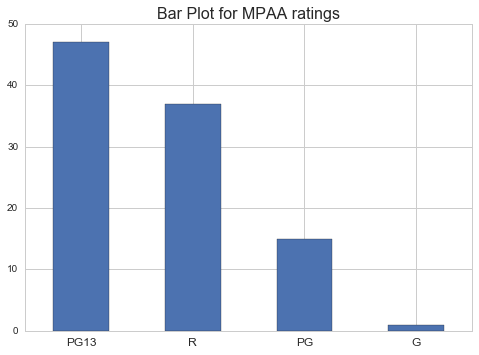

In [53]:
sns.set(style="whitegrid", color_codes=True)

fig = y.value_counts().plot(kind = 'bar')
plt.title("Bar Plot for MPAA ratings", fontsize = 16)
fig.set_xticklabels(['PG13', 'R', 'PG', 'G'],rotation = 'horizontal', fontsize = 12);


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=4444)
scaler = sklearn.preprocessing.StandardScaler().fit(X)

max_accuracy = 0
acc =[]

for k in range(1, 10):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaler.transform(x_train),y_train)
    y_hat = knn.predict(scaler.transform(x_test))
    acc.append(accuracy_score(y_test,y_hat))
    
max_accuracy = max(acc)

print('Maximum accuracy ', max_accuracy,' is achieved at k = ', [i for i,v in enumerate(acc) if v==max_accuracy])

LR = LogisticRegression()
LR.fit(scaler.transform(x_train),y_train)
y_hat = LR.predict(scaler.transform(x_test))
LR_accuracy = accuracy_score(y_test,y_hat)
    
print('Logistic Regression accuracy = ', LR_accuracy)

Maximum accuracy  0.633333333333  is achieved at k =  [4]
Logistic Regression accuracy =  0.566666666667


In [55]:
#Predict Rating with just one category.
def predict_rating(X):
    size = X.shape
    res = pd.Series(np.empty(size[0]))
    res[:] = 'PG-13'
    return(res)

In [56]:
y_hat = predict_rating(x_test)
rating_accuracy = accuracy_score(y_test,y_hat)

print('Predicting movies to be PG13 has accuracy = ', rating_accuracy)

Predicting movies to be PG13 has accuracy =  0.466666666667


### Below I tried to run statsmodels.formula.api.Logit for regression, but did not succeed. Please disregard.

In [57]:
df.Budget = df.Budget.fillna(df.Budget.mean())
df.DomesticTotalGross = df.DomesticTotalGross.fillna(df.DomesticTotalGross.mean())
df.Runtime = df.Runtime.fillna(df.Runtime.mean())
df.Budget = df.Budget.astype(int)
df.DomesticTotalGross = df.DomesticTotalGross.astype(int)
df.Runtime = df.Runtime.astype(int)

In [77]:
#y, X = dmatrices("Rating ~ Budget + DomesticTotalGross + Runtime", df, return_type='dataframe')
#x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=4444)
#model = Logit(y_train,x_train)
#model.fit_regularized()
#model.fit()
#model.

### Challenge 12

In [ ]:
df = pd.read_csv('haberman.csv', header = None)
df.columns = ['age_at_diag', 'surgery','lymph_nodes','survival']

In [ ]:
df.head(5)

In [ ]:
print('The mean age of patients is',"{0:.3f}".format(df.age_at_diag.mean()),
      'with standard deviation of',"{0:.3f}".format(df.age_at_diag.std()))
print('The mean age of patients who survived more than 5 years is',"{0:.3f}".format(df[df.survival == 2].age_at_diag.mean()),
      'with standard deviation of',"{0:.3f}".format(df[df.survival == 2].age_at_diag.std()))
print('The mean age of patients who survived less than 5 years is',"{0:.3f}".format(df[df.survival == 1].age_at_diag.mean()),
      'with standard deviation of',"{0:.3f}".format(df[df.survival == 1].age_at_diag.std()))



In [ ]:
sns.set(style="whitegrid", color_codes=True)
f = plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.hist(df.age_at_diag)
plt.xlabel('age')

plt.subplot(1,2,2)
plt.hist(df.lymph_nodes)
plt.xlabel('lymph nodes');

In [ ]:
print("The earliest year of surgery is", '19' + str(df.surgery.min()))
print("The most recent year of surgery is", '19'+str(df.surgery.max()))

In [ ]:
df.survival = df.survival.replace(to_replace=[1,2],value=[0,1])
df.age_at_diag = df.age_at_diag.astype(int)
df.lymph_nodes = df.lymph_nodes.astype(int)
df.surgery = df.surgery.astype(int);

In [ ]:
y, X = dmatrices('survival ~ age_at_diag + lymph_nodes + surgery', data=df, return_type='dataframe')
Logit(y, X).fit().summary()


The most significant coefficient is number of lymph nodes that tested positive for cancer.

In [ ]:
LR = LogisticRegression()
train_sizes, train_scores, test_scores = learning_curve(LR, df.iloc[:,:2], df.iloc[:,3], cv=3, train_sizes=np.array([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 1]))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

p1, = plt.plot(train_sizes,train_scores_mean)
p2, = plt.plot(train_sizes,test_scores_mean);

plt.xlabel('training size', fontsize = 16)
plt.ylabel('error', fontsize = 16)
plt.title("Learning Curve", fontsize=18)
plt.xlim((0,200))
plt.legend([p1, p2],['Training Score', 'Cross-Validation Score'], loc=9, bbox_to_anchor=(1.3, 1), fontsize = 12);